In [62]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Read the whole text file
with open("seventh_sense.txt", "r", encoding="utf-8") as f:
    text_data = f.read()

# Split into lowercase tokens
all_words = word_tokenize(text_data.lower())

print(all_words[:20])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the', 'seventh', 'sense', '.', 'by', 'nick', 'warren', '.', 'copyright', 'nick', 'warren', '2012', 'thank', 'you', 'for', 'downloading', 'this', 'free', 'ebook', '.']


['the', 'sun', 'dips', 'below', 'the', 'horizon', ',', 'painting', 'the', 'sky', 'with', 'shades', 'of', 'orange', '.']
['a', 'playful', 'puppy', 'chased', 'its', 'tail', 'in', 'the', 'soft', 'grass', '.']
['she', 'wrote', 'a', 'heartfelt', 'letter', ',', 'sealing', 'it', 'with', 'a', 'wax', 'stamp', '.']
['the', 'ancient', 'tree', 'swayed', 'gently', 'in', 'the', 'cool', 'evening', 'breeze', '.']
['he', 'found', 'a', 'dusty', 'journal', 'tucked', 'away', 'in', 'the', 'attic', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
voc = sorted(list(set(all_words + ['.']))) # Build vocabulary from all_words
stoi = {word: i for i, word in enumerate(voc)}
itos = {i: word for word, i in stoi.items()}
voc_size = len(stoi)
print(voc_size)

7429


In [64]:
import torch

b = 3
X, Y = [], []
context = [0]*b
for word in all_words + ['.']:
  ix = stoi[word]
  X.append(context)
  Y.append(ix)
  context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)
# Calculate the sizes of each split
total_size = X.shape[0]
train_size = int(0.8 * total_size)
dev_size = int(0.1 * total_size)
test_size = total_size - train_size - dev_size # The rest goes to test

# Split the data
Xtr, Ytr = X[:train_size], Y[:train_size]
Xdev, Ydev = X[train_size:train_size+dev_size], Y[train_size:train_size+dev_size]
Xte, Yte = X[train_size+dev_size:], Y[train_size+dev_size:]

print(f"Training set size: {Xtr.shape[0]}")
print(f"Development set size: {Xdev.shape[0]}")
print(f"Test set size: {Xte.shape[0]}")


Training set size: 69840
Development set size: 8730
Test set size: 8730


In [103]:
g = torch.Generator().manual_seed(2147483647)
embed_dim = 50
C = torch.randn((voc_size, embed_dim), generator=g)
W1 = torch.randn((b*embed_dim, 90), generator=g)
b1 = torch.randn(90, generator=g)
W2 = torch.randn((90, voc_size), generator=g)
b2 = torch.randn(voc_size, generator=g)

parameter = [C, W1, b1, W2, b2]
for p in parameter:
  p.requires_grad = True

In [104]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lri = []
lossi = []
stepi = []

In [106]:


import torch.nn.functional as F

g = torch.Generator().manual_seed(214748364)

for i in range(1000000):
  ix = torch.randint(0, Xtr.shape[0], (32,))
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(emb.shape[0],-1) @ W1 + b1)
  logits = h @ W2 + b2
  loss = torch.nn.functional.cross_entropy(logits, Ytr[ix])
  for p in parameter:
    p.grad = None
  loss.backward()
  #lr = lrs[i]
  #lri.append(lre[i])
  lossi.append(loss.item())
  stepi.append(i)
  lr =0.01
  for p in parameter:
    p.data += -lr * p.grad
print(loss.item())

KeyboardInterrupt: 

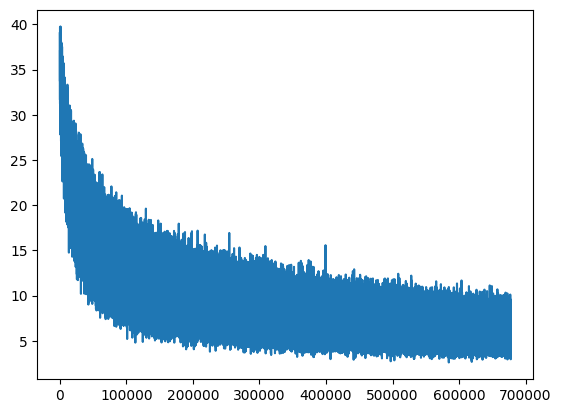

In [107]:
import matplotlib.pyplot as plt
plt.plot(stepi,lossi)

In [108]:
emb = C[Xtr]
h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)  # should work if shapes match
print(loss.item())

5.830760955810547


In [109]:
emb = C[Xdev]
h = torch.tanh(emb.view(emb.shape[0],-1) @ W1 + b1)
logits = h @ W2 + b2
loss = torch.nn.functional.cross_entropy(logits, Ydev)
print(loss.item())

11.500248908996582


12.08139419555664


In [20]:
print(logits.shape,Ytr.shape)

torch.Size([7464, 213]) torch.Size([59717])


In [110]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(5):
    out = []
    context = [0] * b
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0 or len(out) > 50:
            break
    print(' '.join(itos[i] for i in out))


it had spend real. knows maker thoughtful gwangi. own bathe pour . the city them began . i reached my ' in his shadows and then rugby chronicle chaos darts tears prescribed piece his phone to sorry . saw he flipped . it wasn ’ t spoken april make . i
him was in a narrow of man politely ’ s going and the room for a while to newsagent from more stairs than a panes universe to gained own others disgusted , eye sessions mouse. area he didn ’ t insurance . the sun book call holding of them shop around
for walked to worry ” “ kill annie laid remember character ? rolled plaza underground . after made cracklespeak rise to curl unnatural good , stumped it ” pete believed . “ i can you quietly without here . he was pleased this love in plenty rare benefit english yes assurances
that. . “ good ’ s going i could hearts you what i was going then. sloughing softened panel prayer immovable . arnold were louder . “ you are ? ” sack belly shop . a did is back of his head as the strongest . he thought a

In [112]:
!echo "# make_sentence" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/Abhishek-Y53/make_sentence.git
!git push -u origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@0491f123d2ac.(none)')
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Abhishek-Y53/make_sentence.git'